In [64]:
#Load necessary Libraries
import pandas as pd
import numpy as np
import pickle

In [65]:
# Load dataset
df = pickle.load(open("MS_NM_vector.pickle", 'rb'))
df

,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,dim_10,...,dim_291,dim_292,dim_293,dim_294,dim_295,dim_296,dim_297,dim_298,dim_299,dim_300
0,-0.553324,-0.138454,-0.045388,-0.132011,0.720577,0.250219,-0.587359,0.274449,-0.786303,1.417485,...,-0.153468,-0.639443,-0.956576,1.625992,1.431355,-2.663177,-0.994959,2.307497,1.531194,-1.226561
1,0.521250,0.911673,-0.659806,-0.077315,-1.282651,0.076453,-0.474844,-0.980811,0.674011,1.790803,...,1.181993,-0.596261,2.101596,-0.710893,0.213634,-0.301207,0.449739,-1.218724,0.552643,0.854832
2,0.433390,0.526440,0.839283,-0.400845,0.285049,-0.844874,0.059623,-0.041864,0.486536,0.442388,...,-0.748892,-0.912826,-0.331387,-0.286463,-0.421099,-0.519123,-1.553812,0.512496,0.133026,0.070158
3,-0.176667,0.436148,1.065056,0.234268,1.163537,-0.066943,-0.522028,0.972833,-0.673641,0.855437,...,0.370788,-0.024658,2.319303,-0.812172,-1.711151,-1.796012,0.539112,0.623291,-0.132690,0.276335
4,0.462711,-1.149303,-0.342509,0.453314,-1.561153,-1.173529,-0.694596,0.164316,-0.254244,1.159929,...,0.953166,-0.031245,1.031400,0.502952,0.129597,-0.343925,-0.664846,-0.942154,0.016919,0.285422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2578,0.601184,1.681541,2.355218,-0.156708,-0.255610,-0.382882,-0.882682,-0.355536,-0.420445,0.241321,...,-1.066611,-1.984733,-0.654360,-2.142338,-0.763030,0.407976,1.039158,-2.210763,2.032165,0.121026
2579,0.554377,0.263018,-0.215427,-0.178139,-0.537649,-0.473560,-2.722322,1.820391,-0.301543,-0.904536,...,-1.251106,-0.091132,0.590598,-0.737561,-0.974242,-0.283213,-0.060491,-1.423453,0.566703,0.541766
2580,2.213782,1.298251,-0.810987,0.491603,-0.561738,-2.083829,-0.124236,2.125675,-0.692431,0.366288,...,-0.845313,-0.755456,-0.381664,2.060044,1.180745,1.924711,-1.069884,-0.544295,0.449652,-2.244463
2581,0.637346,-2.552317,2.235605,-1.215265,0.130622,0.037431,0.698297,-1.907516,-0.340804,1.261990,...,-1.565688,0.852527,0.415011,0.521732,0.789340,0.467500,0.494460,0.124463,-0.291300,-2.642436


## Objective: To cluster the data using UMAPS
1. Use UMAPS to reduce the dimensionality of the data to 2 dimensions
2. Cluster the data
3. Embed Date information into the data
4. Plot the data giving each year a different color

In [6]:
%pip install umap

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3551 sha256=6551ab50e7047a0509396f2a373eb420e7702af61c094c5211667fdc13028c31
  Stored in directory: c:\users\yatika arora\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local\pip\cache\wheels\82\d8\73\e9eb3334baaad795ff0278363ff1aca7568bdf2793e452a527
Successfully built umap
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\Yatika Arora\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [10]:
%pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


In [9]:
%pip install --upgrade pip

     ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
      --------------------------------------- 0.0/2.1 MB 1.4 MB/s eta 0:00:02
     -- ------------------------------------- 0.1/2.1 MB 1.3 MB/s eta 0:00:02
     -- ------------------------------------- 0.1/2.1 MB 1.2 MB/s eta 0:00:02
     --- ------------------------------------ 0.2/2.1 MB 1.1 MB/s eta 0:00:02
     --- ------------------------------------ 0.2/2.1 MB 1.1 MB/s eta 0:00:02
     ---- ----------------------------------- 0.2/2.1 MB 1.0 MB/s eta 0:00:02
     ---- ----------------------------------- 0.3/2.1 MB 927.4 kB/s eta 0:00:02
     ----- ---------------------------------- 0.3/2.1 MB 905.4 kB/s eta 0:00:02
     ------ --------------------------------- 0.3/2.1 MB 846.5 kB/s eta 0:00:03
     ------ --------------------------------- 0.3/2.1 MB 846.5 kB/s eta 0:00:03
     ------- -------------------------------- 0.4/2.1 MB 791.2 kB/s eta 0:00:03
     ---------- ----------------------------- 0.5/2.1 MB 1.0 

In [3]:
%pip install --upgrade umap-learn


                                              0.0/88.2 kB ? eta -:--:--
     ---------------------------              61.4/88.2 kB 1.1 MB/s eta 0:00:01
     ---------------------------------------- 88.2/88.2 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
                                              0.0/2.6 MB ? eta -:--:--
     ---                                      0.2/2.6 MB 6.3 MB/s eta 0:00:01
     ---                                      0.2/2.6 MB 3.0 MB/s eta 0:00:01
     --------                                 0.5/2.6 MB 4.2 MB/s eta 0:00:01
     -------------                            0.8/2.6 MB 5.3 MB/s eta 0:00:01
     ------------------                       1.2/2.6 MB 5.9 MB/s eta 0:00:01
     ----------------------                   1.4/2.6 MB 6.0 MB/s eta 0:00:01
     -------------------------                1.6/2.6 MB 5.5 MB/s eta 0:00:01
     ------------------------------           1.9

In [66]:
from umap import UMAP

### Dimensionality Reduction | UMAPS


In [67]:
# Load the UMAP model
umap = UMAP(n_components=2, random_state=42)

#ABOUT THE MODEL
# n_components parameter set to 2 to reduce the above dimensionality to 2 in order to get a 2-D plot.
# the random_state parameter allows you to control the randomness in code and ensure reproducibility to facilitate comparision


In [68]:
umap_data = umap.fit_transform(df)

In [69]:
# create a new dataframe and Apply the UMAP model to the dimension columns matrix
df_umap = pd.DataFrame(umap_data, columns=['x', 'y'])
df_umap

,x,y
0,1.746477,-1.008100
1,-1.720280,1.610274
2,0.832703,1.425526
3,1.524108,2.015462
4,2.573344,-0.315654
...,...,...
2578,1.344322,1.529441
2579,1.381375,1.623309
2580,1.019732,1.654758
2581,1.231268,2.297428


In [24]:
# Plot the UMAP model
import matplotlib.pyplot as plt

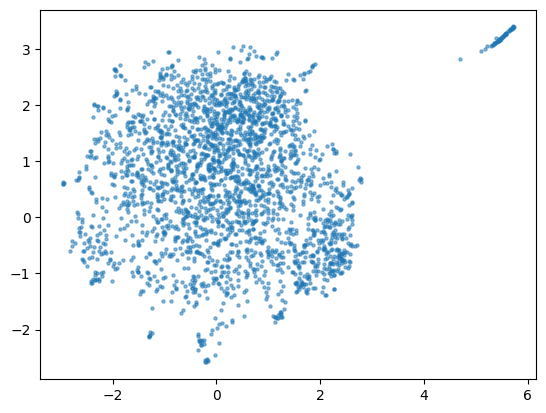

In [25]:
# Plot the UMAP model
plt.scatter(df_umap['x'], df_umap['y'], s=5, alpha=0.5)
plt.show()

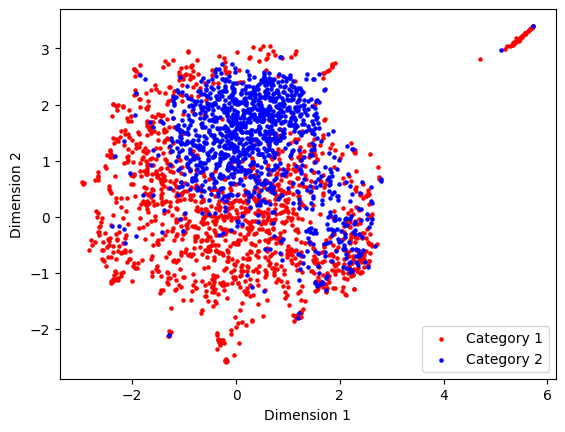

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with two-dimensional vectors and 1400 entries

# Extract the vectors and category indices
vectors = df_umap.values  
category_indices = list(range(2583))  # Create category indices

# Separate vectors and category indices for two categories
category1_vectors = vectors[:1401]  # Assuming the first 1401 vectors belong to category 1
category1_indices = category_indices[:1401]

category2_vectors = vectors[1401:]  # Assuming the remaining vectors belong to category 2
category2_indices = category_indices[1401:]

# Create the scatter plot
plt.scatter(category1_vectors[:, 0], category1_vectors[:, 1], c='red', s=5,label='Category 1')
plt.scatter(category2_vectors[:, 0], category2_vectors[:, 1], c='blue',s=5,label='Category 2')

# Add labels and legend
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()

# Show the plot
plt.show()


In [70]:
meta_df = pickle.load(open("META.pickle", 'rb'))

In [74]:
# Embed the date column into the UMAP model, create a new dataframe
df_dim_date = pd.concat([df_umap, meta_df['Date']], axis=1)
# Only keep the year in the date column, date is in string, in lambda function, convert it to datetime, and then extract the year
df_dim_date['Date'] = df_dim_date['Date'].apply(lambda x: pd.to_datetime(x).year)

In [72]:
df_dim_date

,x,y,Date
0,1.746477,-1.008100,2004
1,-1.720280,1.610274,2004
2,0.832703,1.425526,2004
3,1.524108,2.015462,2004
4,2.573344,-0.315654,2004
...,...,...,...
2578,1.344322,1.529441,2023
2579,1.381375,1.623309,2023
2580,1.019732,1.654758,2023
2581,1.231268,2.297428,2023


In [75]:
# Delete the entry with year nan
df_dim_date = df_dim_date[df_dim_date['Date'] != 'nan']

In [76]:
# Print unique years
df_dim_date['Date'].unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

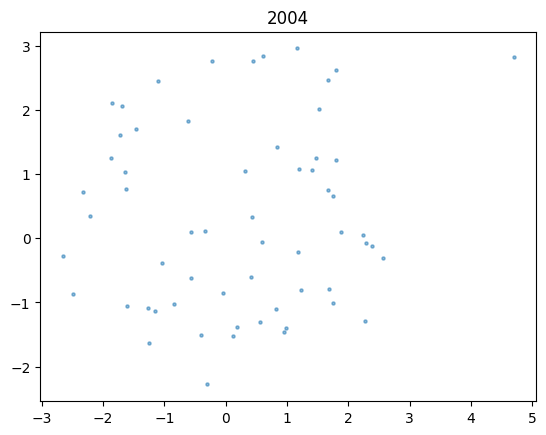

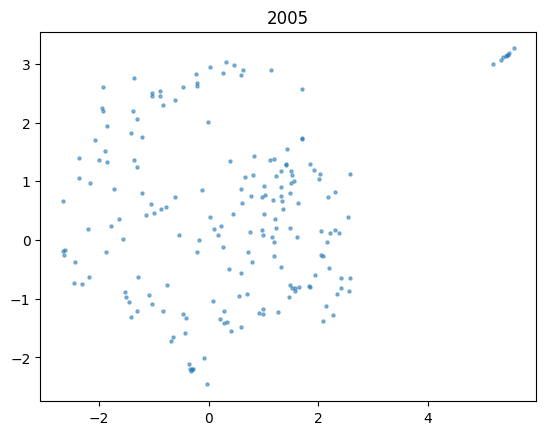

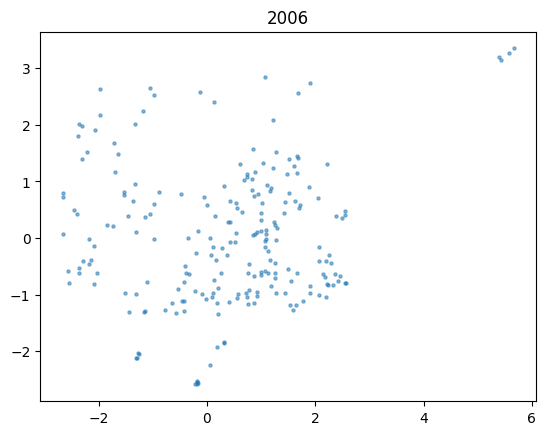

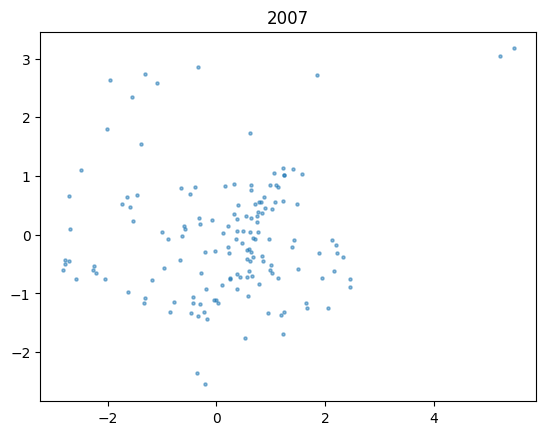

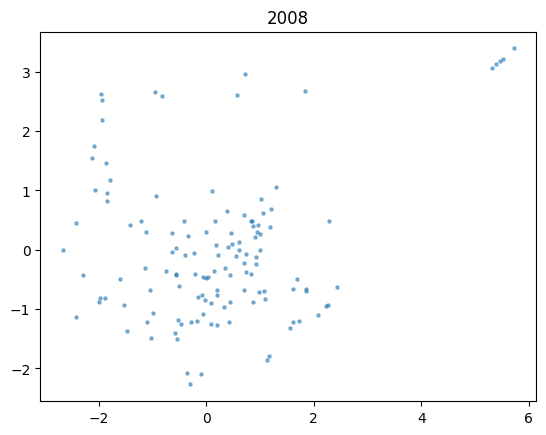

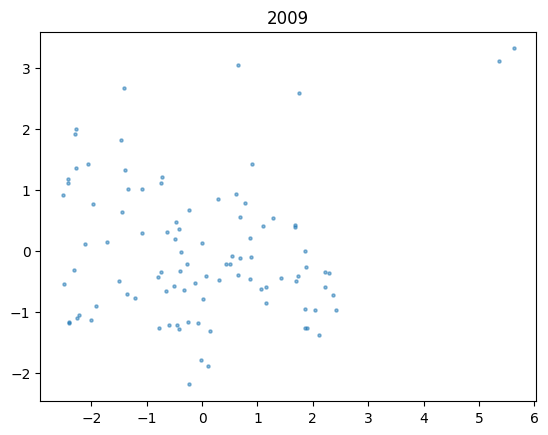

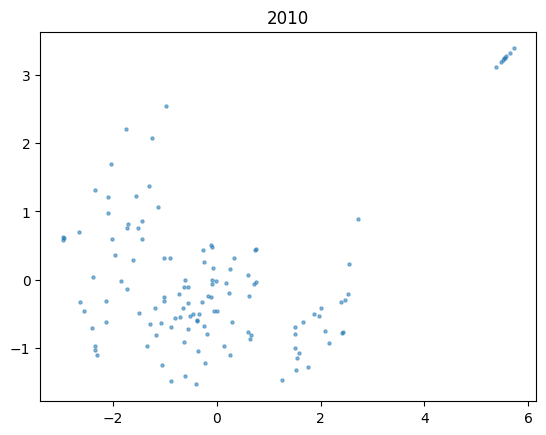

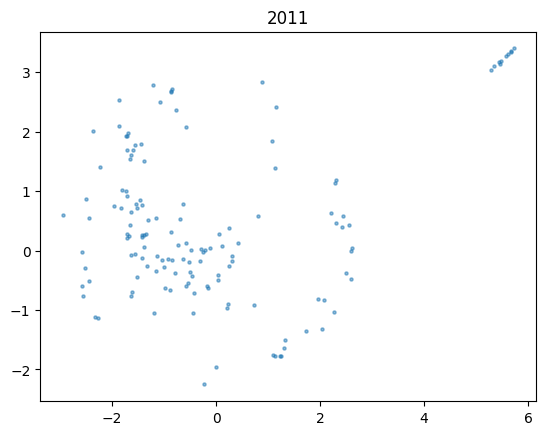

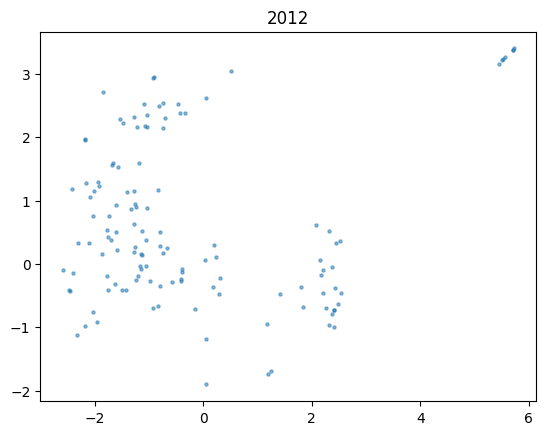

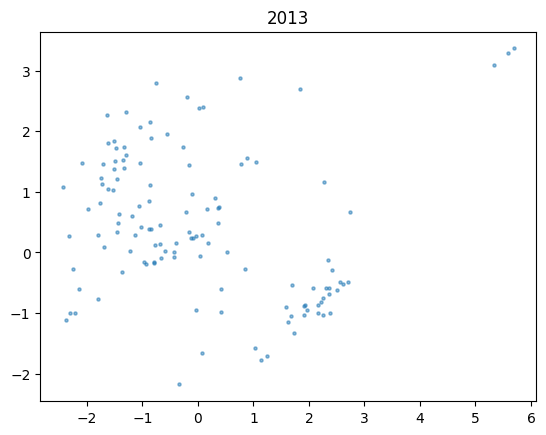

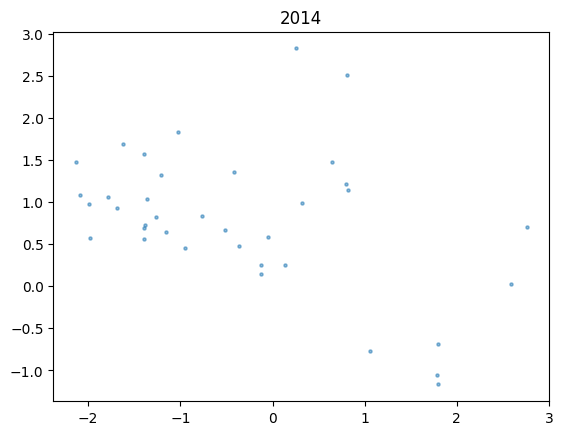

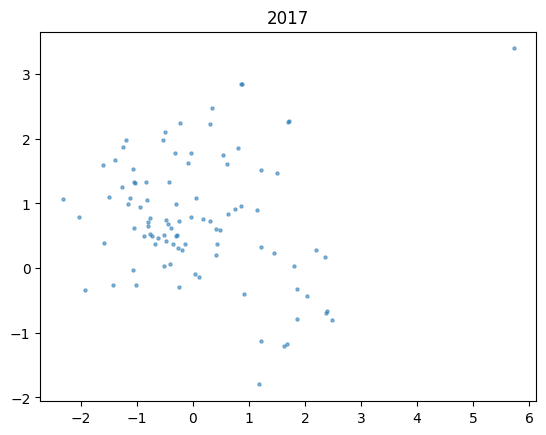

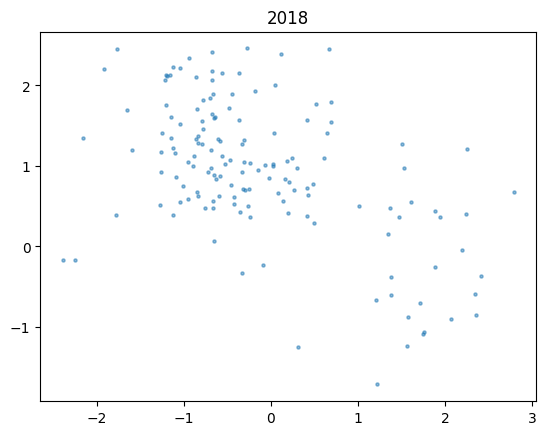

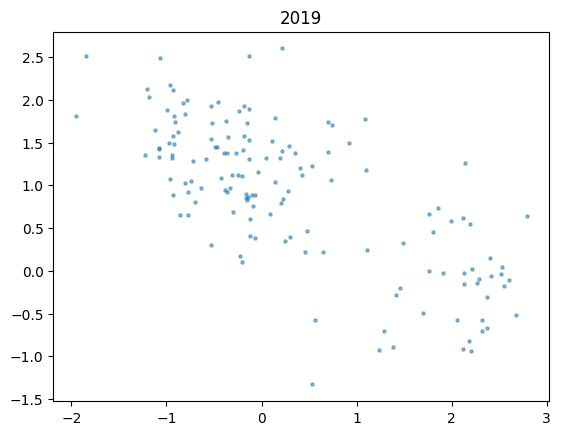

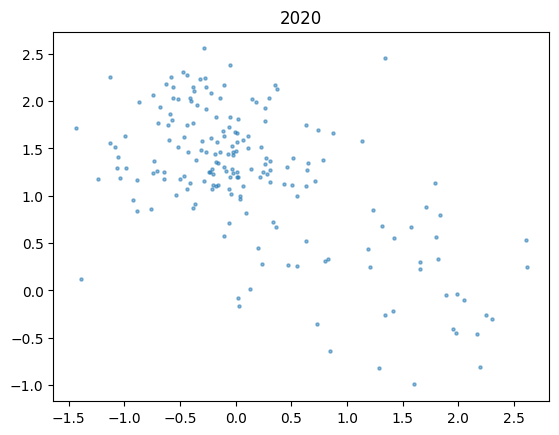

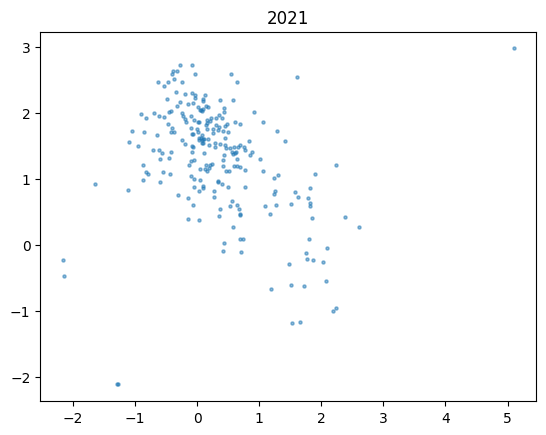

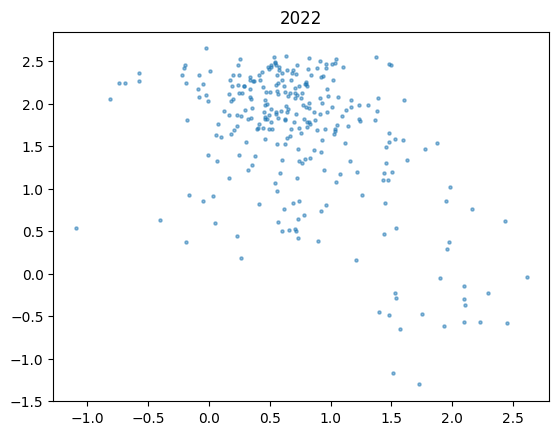

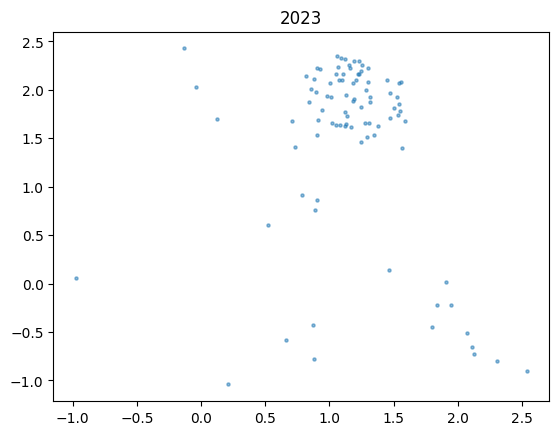

In [77]:
# Plot the UMAP model sub graphs. In each graph, only keep the data of one year and rest paint it as gray
for year in df_dim_date['Date'].unique():
    plt.scatter(df_dim_date[df_dim_date['Date'] == year]['x'],
                df_dim_date[df_dim_date['Date'] == year]['y'],
                s=5, alpha=0.5)
    plt.title(year)
    plt.show()

### Clustering
1. Use KMeans to cluster the data

In [78]:
# import the KMeans model
from sklearn.cluster import KMeans

In [38]:
df_umap.head()

,x,y
0,1.746477,-1.008100
1,-1.720280,1.610274
2,0.832703,1.425526
3,1.524108,2.015462
4,2.573344,-0.315654


In [39]:
# Unique years
df_dim_date['Date'].unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

In [41]:
df_dim_date.shape

(2583, 3)

We idealy want clusters for each year.
We will use the elbow method to determine the number of clusters
Elbow method is a method of interpretation and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters in a dataset. It is a heuristic method to estimate the optimal number of clusters in a data set given by the sum of squared errors (SSE) within clusters.

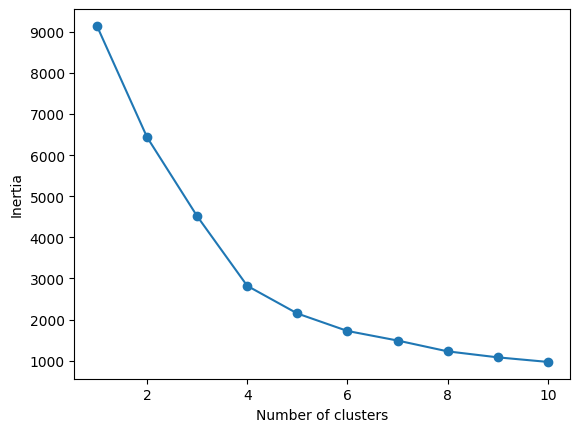

In [42]:
# Find the optimal number of clusters in df_umap using the elbow method
# Create a list of inertia values
inertia = []
for i in range(1, 11):
    # Create a KMeans instance with i clusters: model
    model = KMeans(n_clusters=i, random_state=42, n_init='auto')

    # Fit model to samples
    model.fit(df_umap)

    # Append the inertia to the list of inertia
    inertia.append(model.inertia_)

# Plot the inertia vs number of clusters
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


Here a decrease in the SSE is observed as the number of clusters increases. The point where the SSE curve starts to bend is considered as the optimal number of clusters. 
In the plot below, the elbow is at k=4 indicating the optimal k for this dataset is 4.

In [79]:
# Create a KMeans instance with 4 clusters: model
model = KMeans(n_clusters=5, random_state=42, n_init='auto')
# Fit model to df_umap
model.fit(df_umap)

KMeans(n_clusters=5, n_init='auto', random_state=42)

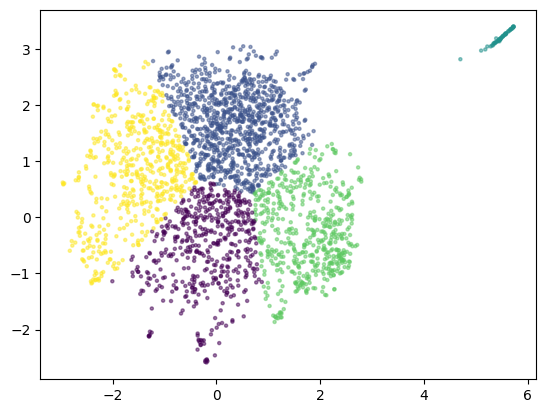

In [80]:
# Plot the clusters
plt.scatter(df_umap['x'], df_umap['y'], c=model.labels_, s=5, alpha=0.5)

In [81]:
df_umap.loc[:1401, 'z'] = 1
df_umap.loc[1401:, 'z'] = 2
df_umap

,x,y,z
0,1.746477,-1.008100,1.0
1,-1.720280,1.610274,1.0
2,0.832703,1.425526,1.0
3,1.524108,2.015462,1.0
4,2.573344,-0.315654,1.0
...,...,...,...
2578,1.344322,1.529441,2.0
2579,1.381375,1.623309,2.0
2580,1.019732,1.654758,2.0
2581,1.231268,2.297428,2.0


C:\Users\Yatika Arora\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


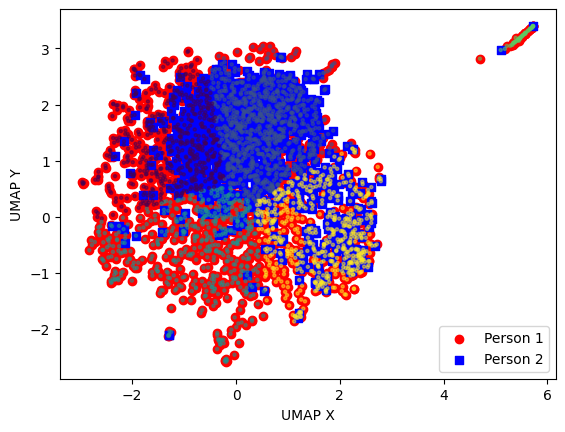

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you have a DataFrame named 'df_umap' with UMAP coordinates and 'person' column indicating the person (1 or 2)

# Create a KMeans instance with 5 clusters
model = KMeans(n_clusters=5, random_state=42)
# Fit model to df_umap
model.fit(df_umap[['x', 'y']])  # Assuming 'x' and 'y' are the UMAP coordinates

# Create separate DataFrames for person 1 and person 2
person1_df = df_umap[df_umap['z'] == 1.0]
person2_df = df_umap[df_umap['z'] == 2.0]

# Assign different colors or markers to person 1 and person 2
person1_color = 'red'
person2_color = 'blue'
person1_marker = 'o'
person2_marker = 's'

# Plot the data points with different colors or markers for each person
plt.scatter(person1_df['x'], person1_df['y'], c=person1_color, marker=person1_marker, label='Person 1')
plt.scatter(person2_df['x'], person2_df['y'], c=person2_color, marker=person2_marker, label='Person 2')

# Plot the cluster centers
plt.scatter(df_umap['x'], df_umap['y'],c=model.labels_, s=5, alpha=0.5)

# Add labels and a legend
plt.xlabel('UMAP X')
plt.ylabel('UMAP Y')
plt.legend()

# Show the plot
plt.show()


C:\Users\Yatika Arora\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


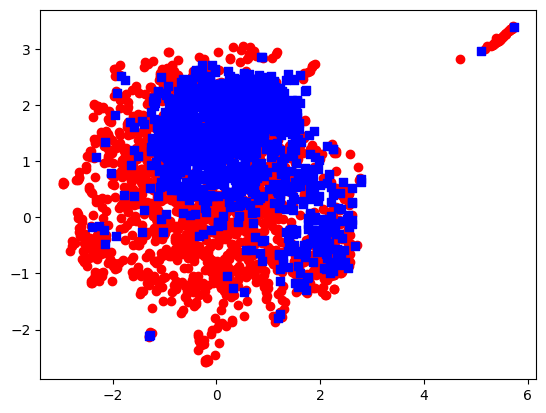

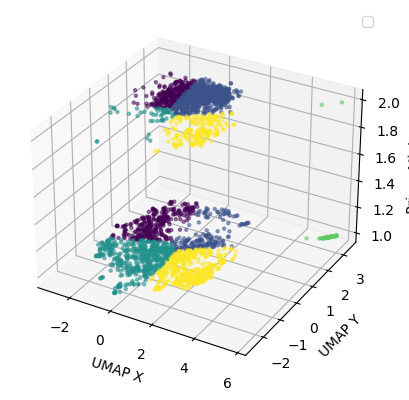

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you have a DataFrame named 'df_umap' with UMAP coordinates and 'person' column indicating the person (1 or 2)

# Create a KMeans instance with 5 clusters
model = KMeans(n_clusters=5, random_state=42)
# Fit model to df_umap
model.fit(df_umap[['x', 'y']])  # Assuming 'x' and 'y' are the UMAP coordinates

# Create separate DataFrames for person 1 and person 2
person1_df = df_umap[df_umap['z'] == 1.0]
person2_df = df_umap[df_umap['z'] == 2.0]

# Assign different colors or markers to person 1 and person 2
person1_color = 'red'
person2_color = 'blue'
person1_marker = 'o'
person2_marker = 's'

# Plot the data points with different colors or markers for each person
plt.scatter(person1_df['x'], person1_df['y'], c=person1_color, marker=person1_marker, label='Person 1')
plt.scatter(person2_df['x'], person2_df['y'], c=person2_color, marker=person2_marker, label='Person 2')

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the cluster centers
ax.scatter(df_umap['x'], df_umap['y'],df_umap['z'],c=model.labels_, s=5, alpha=0.5)

# Add labels and a legend
ax.set_xlabel('UMAP X')
ax.set_ylabel('UMAP Y')
ax.set_zlabel('Prime Ministers')
ax.legend()

# Show the plot
plt.show()


In [83]:
# Append the cluster label to the dataframe of df_dim_date
df_dim_date['cluster'] = model.labels_
df_dim_date

,x,y,Date,cluster
0,1.746477,-1.008100,2004,4
1,-1.720280,1.610274,2004,0
2,0.832703,1.425526,2004,1
3,1.524108,2.015462,2004,1
4,2.573344,-0.315654,2004,4
...,...,...,...,...
2578,1.344322,1.529441,2023,1
2579,1.381375,1.623309,2023,1
2580,1.019732,1.654758,2023,1
2581,1.231268,2.297428,2023,1


Digression:
sorting the meta_df according to clusters


In [100]:
cluster_df= pd.concat([meta_df,df_dim_date['cluster']], axis=1)

In [101]:
cluster_df

,index,Date,Location,Title,Speech,Cleaned_Speech,Cleaned_Speech_string,cluster
0,MSS1,2004-06-24,New Delhi,Prime Minister 's Address to the Nation,"My Fellow Citizens,I speak to you with a deep...",['fellow citizen speak deep sense humility ful...,fellow citizen speak deep sense humility fully...,4
1,MSS2,2004-06-29,New Delhi,PM's inaugural address at the Chief Ministers'...,"""I welcome you all to this Conference which w...",['welcome conference take stock effort rural d...,welcome conference take stock effort rural dev...,0
2,MSS3,2004-07-03,New Delhi,"PM's inaugural address at the ""Dialogue on Min...","""It gives me great pleasure to be amongst you...","['give great pleasure amongst morning', 'parti...",give great pleasure amongst morning particular...,1
3,MSS4,2004-07-26,New Delhi,PM's speech at the CSIR Society Meeting,"Distinguished Members of the CSIR Society, La...",['distinguished member csir society lady gentl...,distinguished member csir society lady gentlem...,1
4,MSS5,2004-07-31,Bangkok,PM’ statement at the Press Conference,"\n\t""My two days in Bangkok have been very use...","['two day bangkok useful productive', 'first b...",two day bangkok useful productive first bimste...,4
...,...,...,...,...,...,...,...,...
2578,NMS1178,2023-04-09,NaN,English rendering of PM’s address at the inaug...,My colleagues in the Union Cabinet Shri Bhupen...,['colleague union cabinet shri bhupender yadav...,colleague union cabinet shri bhupender yadav j...,1
2579,NMS1179,2023-04-12,NaN,English rendering of PM’s address at training ...,Namaskar! \n\nThe campaign to provide governme...,"['namaskar', 'campaign provide government job ...",namaskar campaign provide government job youth...,1
2580,NMS1180,2023-04-12,NaN,English rendering of PM’s address during flagg...,"Namaskar, Governor of Rajasthan Shri Kalraj Mi...",['namaskar governor rajasthan shri kalraj mish...,namaskar governor rajasthan shri kalraj mishra...,1
2581,NMS1181,2023-04-14,NaN,English rendering of PM’s address at inaugurat...,"Governor of Assam Shri Gulab Chand Kataria ji,...",['governor assam shri gulab chand kataria ji c...,governor assam shri gulab chand kataria ji chi...,1


In [102]:
df_sorted = cluster_df.sort_values(by='cluster')
df_sorted

,index,Date,Location,Title,Speech,Cleaned_Speech,Cleaned_Speech_string,cluster
1291,MSS1292,2013-06-05,New Delhi,PM’s address at the Chief Ministers’ Conferenc...,\n\t“I welcome all Chief Ministers and other d...,['welcome chief minister distinguished partici...,welcome chief minister distinguished participa...,0
1719,NMS319,2019-06-21,NaN,English rendering of PM’s address on Internati...,"On stage, Governor Draupadi ji, the Chief Mini...",['stage governor draupadi ji chief minister mi...,stage governor draupadi ji chief minister mini...,0
1718,NMS318,2019-06-19,NaN,English rendering of PM's Welcome speech on el...,"Hon'ble Speaker sir,It is a moment of immense ...",['hon ble speaker sir moment immense joy pride...,hon ble speaker sir moment immense joy pride m...,0
841,MSS842,2009-12-27,"Jatani, Bhubaneshwar",PM's speech at National Institute for Science ...,I am delighted to be here today to participate...,['delighted today participate foundation stone...,delighted today participate foundation stone l...,0
842,MSS843,2009-12-27,Bhubaneshwar,PM's speech at 92nd annual conference of the I...,It gives me great pleasure to address the 92nd...,['give great pleasure address 92nd conference ...,give great pleasure address 92nd conference in...,0
...,...,...,...,...,...,...,...,...
1922,NMS522,2020-11-05,NaN,Text of PM's address at the Virtual Global Inv...,Namaste.Greetings on the festival season. I am...,"['namaste greeting festival season', 'delighte...",namaste greeting festival season delighted wel...,4
654,MSS655,2008-04-25,"Akhnoor, Jammu & Kashmir",PM's remarks at the Inauguration of Chenab Bridge,ExcerptsI am truly delighted to be here today ...,['excerptsi truly delighted today beautiful st...,excerptsi truly delighted today beautiful stat...,4
1927,NMS527,2020-11-10,NaN,Prime Minister's remarks at Shanghai Cooperati...,"Excellency, President of Russia and President ...",['excellency president russia president today ...,excellency president russia president today ho...,4
1900,NMS500,2020-10-02,NaN,Text of PM's address at Vaishwik Bhartiya Vaig...,"Namaskar!Greetings and gratitude to you all, f...",['namaskar greeting gratitude joining conversa...,namaskar greeting gratitude joining conversati...,4


In [99]:
cluster_sorted = open("cluster_sorted.pickle", "wb")
pickle.dump(df_sorted, cluster_sorted )
cluster_sorted.close()

In [103]:
df_sorted.to_csv('output.csv')

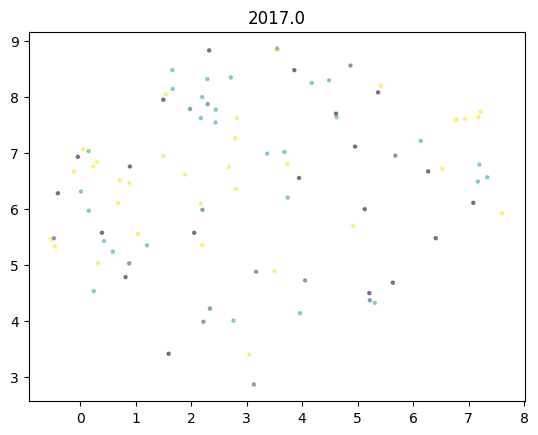

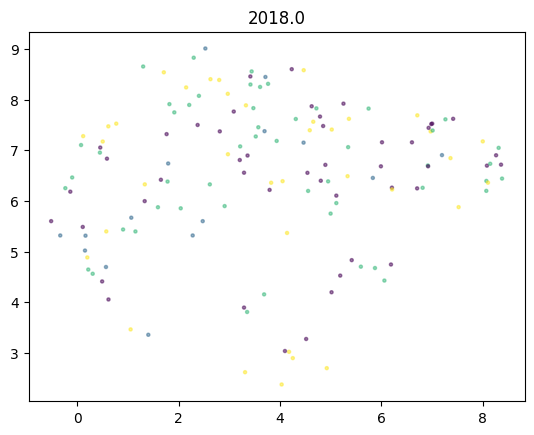

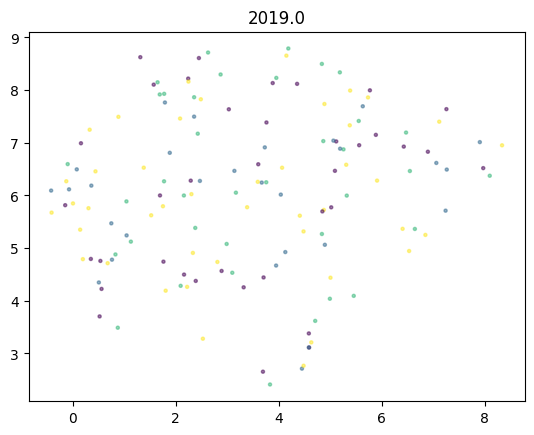

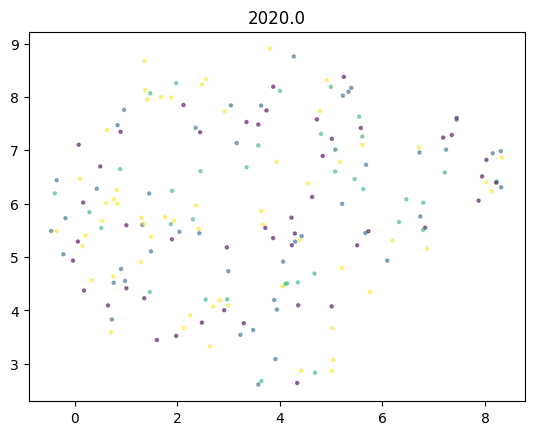

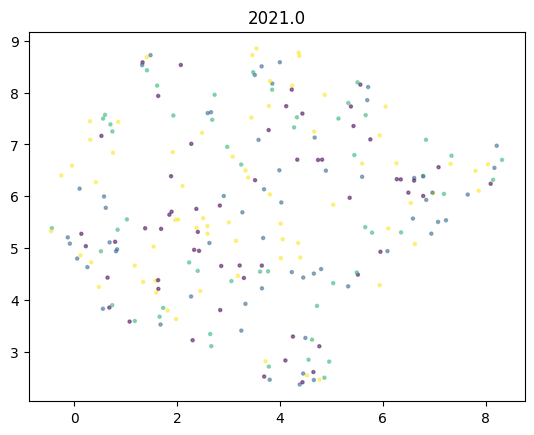

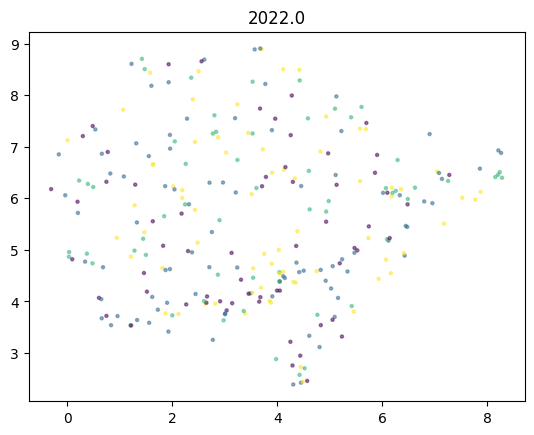

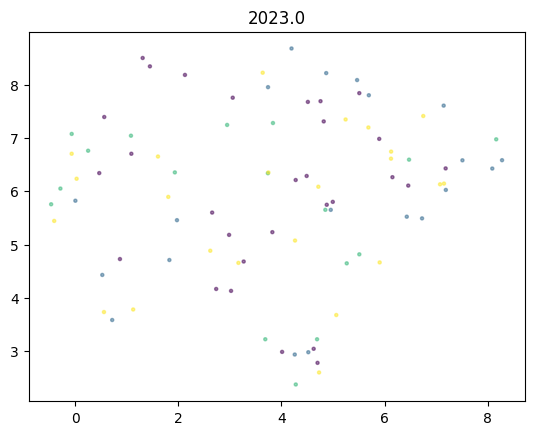

In [51]:
# Plot the clusters sub graphs. In each graph, only keep the data of one year and rest paint it as gray
for year in df_dim_date['Date'].unique():
    plt.scatter(df_dim_date[df_dim_date['Date'] == year]['x'],
                df_dim_date[df_dim_date['Date'] == year]['y'],
                c=df_dim_date[df_dim_date['Date'] == year]['cluster'],
                s=5, alpha=0.5)
    plt.title(year)
    plt.show()
    

In above, we can clearly see that all clusters are more or less equally spreaded over the years.